In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import glob
import os

In [5]:
rowsPerFile = 100 ## if not given(-1), use the whole file rather than a sample
important_cols = ["Tweet_ID", "Date Created", "Sentiment_Label", "Logits_Neutral", "Logits_Positive", "Logits_Negative"]
path = "D:\\CovidTweets\\COVID19_Tweets_Dataset_2021\\Summary_Details"
outputFile = 'peaktweets.csv'
hashtags = pd.read_csv("Hashtag.csv")

totDf = pd.DataFrame()
for file in os.listdir(path):
    dfDets = pd.DataFrame()
    dfSent = pd.DataFrame()
    d = os.path.join(path, file)
    if os.path.isdir(d):
        print(file)
        print(len(totDf))
        all_files = glob.glob(os.path.join(d, "*.csv"))
        for f in all_files:
            nuF = f.replace('Details','Sentiment')
            if(os.path.exists(nuF)):
                fname = f.split('\\')[-1].split("_")[3]
                if fname == "11" or fname == "13" or fname == "15":
                    dfDets = pd.read_csv(f)
                    dfDets = dfDets[dfDets['Tweet_ID'].isin(list(hashtags['Tweet_ID']))]
                    if(rowsPerFile != -1 and len(dfDets) > 10):
                        dfDets = dfDets[dfDets["Language"] == 'en'].sample(n=rowsPerFile, random_state=42)
                    dfSent = pd.read_csv(nuF)
                    totDf = pd.concat([totDf,pd.merge(dfDets,dfSent, how = 'inner',on='Tweet_ID')[important_cols]], ignore_index = True)
totDf.to_csv(outputFile,index=False)

2021_01
0
2021_02
900
2021_03
1730
2021_04
2590
2021_05
3490


c:\users\abala\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3139: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


2021_06
4390
2021_07
5290
2021_08
6110
2021_09
7010
2021_10
7910
2021_11
8720
2021_12
9620


In [ ]:
totDf.to_csv('peaktweets.csv',index=False)

In [5]:
totDf = pd.read_csv('peaktweets.csv')
totDf["Date Created"] =  pd.to_datetime(totDf["Date Created"])
totDf["Day Created"] = totDf["Date Created"].apply(lambda day: day.date())
groupedDf = totDf.groupby("Day Created").Sentiment_Label.value_counts().reset_index(name='count_selected')

In [4]:
pDf = groupedDf[groupedDf["Sentiment_Label"] == "positive"].rename(columns={'count_selected': 'positive_count'}).drop('Sentiment_Label',axis = 1)
netDf = groupedDf[groupedDf["Sentiment_Label"] == "neutral"].rename(columns={'count_selected': 'neutral_count'}).drop('Sentiment_Label',axis = 1)
negDf = groupedDf[groupedDf["Sentiment_Label"] == "negative"].rename(columns={'count_selected': 'negative_count'}).drop('Sentiment_Label',axis = 1)

In [5]:
dateDf = pDf.merge(netDf, how = 'outer', on = 'Day Created').merge(negDf, how = 'outer', on = 'Day Created').fillna(0)

In [6]:
covidData = pd.read_csv("owid-covid-data.csv")
covidData = covidData[(covidData['location'] == 'United States') & (covidData['date'].str.contains('2021'))]
covidData['date'] = pd.to_datetime(covidData['date']).apply(lambda day: day.date())

In [7]:
covidData = covidData.merge(dateDf, how = 'outer', left_on = 'date', right_on = 'Day Created')

In [8]:
covidData

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,Day Created,postive_count,neutral_count,negative_count
0,USA,North America,United States,2021-01-01,20398850.0,177209.0,206544.429,352747.0,2203.0,2589.429,...,78.86,0.926,NaN,NaN,NaN,NaN,2021-01-01,3.0,16.0,11.0
1,USA,North America,United States,2021-01-02,20671292.0,272442.0,214322.857,355267.0,2520.0,2676.286,...,78.86,0.926,NaN,NaN,NaN,NaN,2021-01-02,3.0,12.0,15.0
2,USA,North America,United States,2021-01-03,20874519.0,203227.0,223886.857,356689.0,1422.0,2675.143,...,78.86,0.926,473105.6,15.94,46.02,1403.884082,2021-01-03,4.0,11.0,15.0
3,USA,North America,United States,2021-01-04,21061496.0,186977.0,225618.000,358701.0,2012.0,2691.429,...,78.86,0.926,NaN,NaN,NaN,NaN,2021-01-04,2.0,19.0,9.0
4,USA,North America,United States,2021-01-05,21293659.0,232163.0,229254.286,362273.0,3572.0,2690.714,...,78.86,0.926,NaN,NaN,NaN,NaN,2021-01-05,1.0,17.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,USA,North America,United States,2021-12-27,52918700.0,506097.0,247241.143,818725.0,1846.0,1522.000,...,78.86,0.926,NaN,NaN,NaN,NaN,2021-12-27,3.0,15.0,12.0
361,USA,North America,United States,2021-12-28,53291161.0,372461.0,274427.714,821017.0,2292.0,1576.000,...,78.86,0.926,NaN,NaN,NaN,NaN,2021-12-28,1.0,13.0,16.0
362,USA,North America,United States,2021-12-29,53802748.0,511587.0,312084.000,823385.0,2368.0,1316.429,...,78.86,0.926,NaN,NaN,NaN,NaN,2021-12-29,1.0,13.0,16.0
363,USA,North America,United States,2021-12-30,54400431.0,597683.0,358306.571,824875.0,1490.0,1328.143,...,78.86,0.926,NaN,NaN,NaN,NaN,2021-12-30,2.0,16.0,12.0


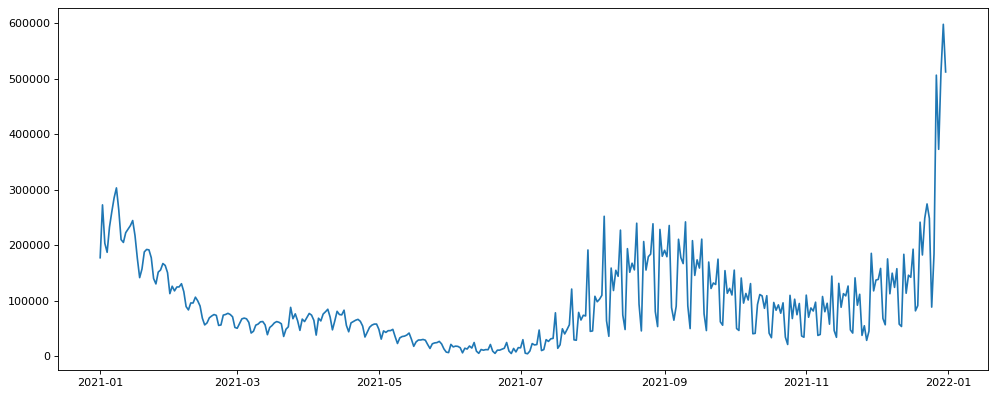

In [14]:
figure(figsize=(15, 6), dpi=80)
plt.plot(covidData['date'], covidData['new_cases'])

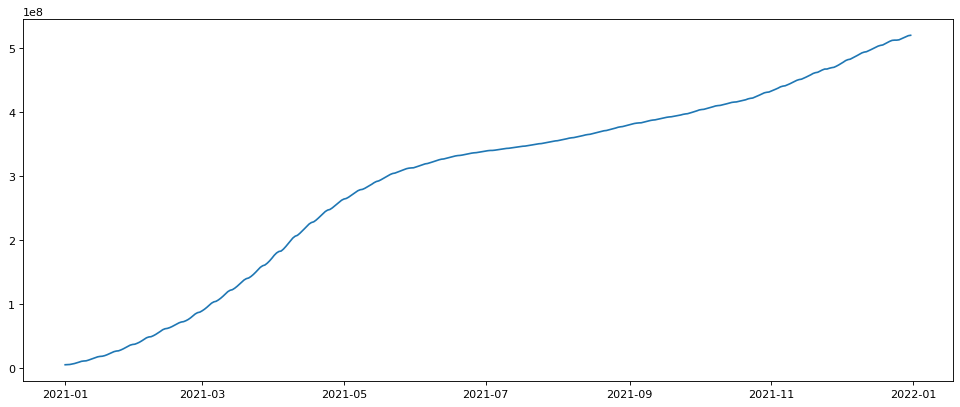

In [16]:
figure(figsize=(15, 6), dpi=80)
plt.plot(covidData['date'], covidData['total_vaccinations'])

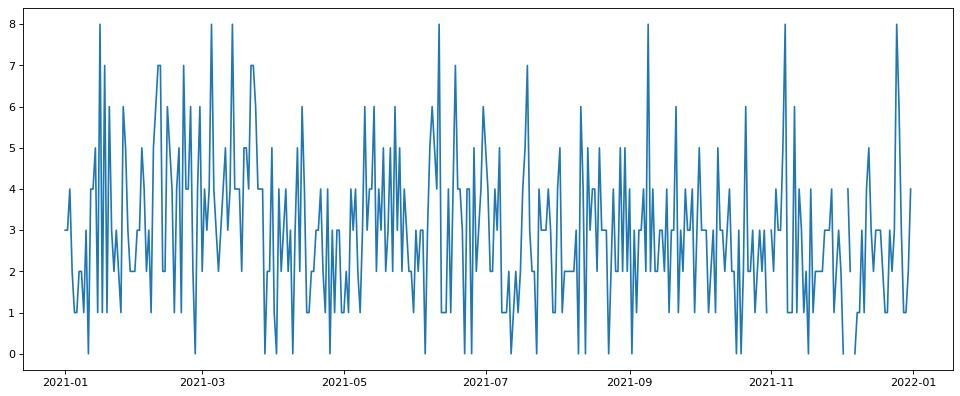

In [20]:
figure(figsize=(15, 6), dpi=80)
plt.plot(covidData['date'], covidData['postive_count'])

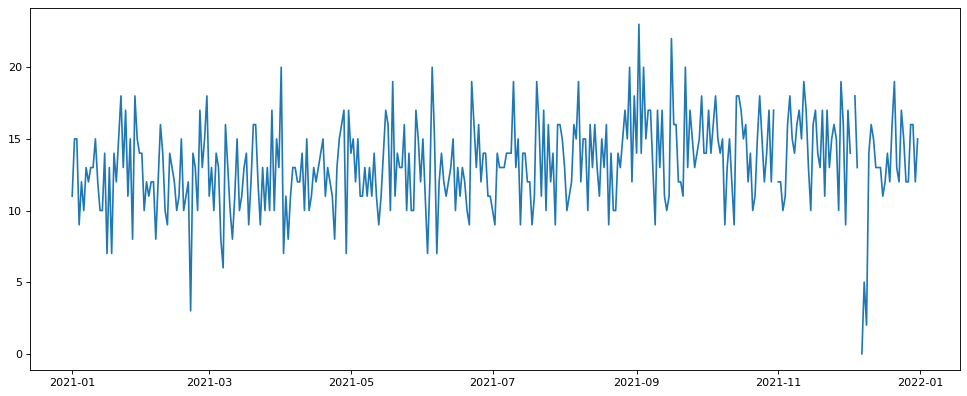

In [21]:
figure(figsize=(15, 6), dpi=80)
plt.plot(covidData['date'], covidData['negative_count'])